In [1]:
# Using bootstrapping on polling data for Mayor Green's grades, 
# estimate the confidence interval for the fraction of 
# citizens that give her a passing grade: defined as more than five.

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('04_06/grades.csv')

In [12]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
grade    100 non-null float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [13]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [16]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


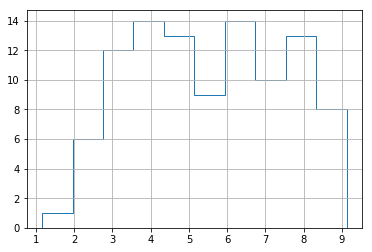

In [6]:
pop.grade.hist(histtype='step')

In [7]:
scipy.stats.percentileofscore(pop.grade, 5) # OVR percent given score which is 43%

43.0

In [8]:
# sampling using replacement and using 100 times

In [9]:
bootstrap = pd.DataFrame({ 'passing' : [scipy.stats.percentileofscore(pop.sample(100, replace=True).grade, 5) for i in range(1000)]})
# This is a thousand point sample create from the ovr given score

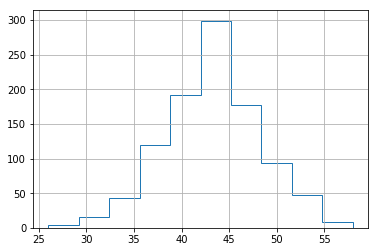

In [10]:
bootstrap.passing.hist(histtype='step') 
# This plots thats score onto a histogram

In [11]:
bootstrap.passing.quantile(0.025) , bootstrap.passing.quantile(0.975)

(33.0, 53.0)

In [ ]:
# Thus, the 95% confidence interval is 33% to 52% 
# for the percentage of citizens who think the mayor is failing. 
# Overall, she very likely has the support of a majority of citizens.

# "Another way to describe this is that the true answer is anywhere
# betweeen the two values which 33% to 52%."